#BIOPHY Coding Assessment 

#Importing Packages

In [ ]:
!pip install category_encoders

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import category_encoders as ce
import tensorflow as tf
import prince
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

#Importing Data

I have imported the provided data into a dataframe here

In [55]:
data_df = pd.read_csv("/content/drive/MyDrive/BioPhy_CodingTest.csv") 
  

#EDA
To begin, I start by understanding the data provided. The data shows that this is a binary classification problem with 13 ( and id) features and a label ("human" or "bot"). We have 37400+ data points. We can instantly drop the id column because this is unique to each data point and does not add any information to the model we end up designing. We can see that we have a mild class imbalance as 66% of the data is labeled as "human" and the rest as "bot". We also have missing values in "language" and "location", the only two categorical features we have. Almost all of the missing values are in the "language" feature (8000\~). When looking at the data points with missing language, we see that 43~% of that data is labeled "human" and the rest "bot". This shows that the missing values do have a random nature. For the three data points with missing "location" (and there is no overlap of missing values between the two features) we see that 2 are "human" and 1 is "bot". We can also see the large range of numeric values over the different features, "favorites_count" has a mean of about 12300 while "tweets per day" has a mean of around 6. The categorical features also have high cardinality in classes, e.g location has over 12000 unique values with the most common being "unknown".

In [56]:
data_df.shape

(37438, 14)

In [57]:
data_df.dtypes

default_profile              bool
default_profile_image        bool
favorites_count             int64
followers_count             int64
friends_count               int64
geo_enabled                  bool
id                        float64
lang                       object
location                   object
statuses_count              int64
verified                     bool
average_tweets_per_day    float64
account_age_days            int64
account_type               object
dtype: object

In [58]:
data_df.columns

Index(['default_profile', 'default_profile_image', 'favorites_count',
       'followers_count', 'friends_count', 'geo_enabled', 'id', 'lang',
       'location', 'statuses_count', 'verified', 'average_tweets_per_day',
       'account_age_days', 'account_type'],
      dtype='object')

In [59]:
data_df.describe()

,favorites_count,followers_count,friends_count,id,statuses_count,average_tweets_per_day,account_age_days
count,37438.000000,3.743800e+04,3.743800e+04,3.743800e+04,3.743800e+04,37438.000000,37438.000000
mean,12302.062183,3.703098e+05,4.445925e+03,1.221485e+17,2.107339e+04,6.891668,3022.128052
std,33923.650237,2.470829e+06,4.954520e+04,3.004180e+17,6.732977e+04,24.580116,1013.695870
min,0.000000,0.000000e+00,0.000000e+00,4.180000e+02,0.000000e+00,0.000000,483.000000
25%,362.000000,3.500000e+01,3.700000e+01,9.957306e+07,1.336250e+03,0.495000,2316.250000
50%,2066.000000,3.650000e+02,2.960000e+02,3.991474e+08,4.209000e+03,1.488000,3219.000000
75%,8879.000000,8.440250e+03,8.930000e+02,2.453826e+09,1.715375e+04,5.528000,3888.000000
max,885123.000000,1.216415e+08,4.343060e+06,1.120000e+18,2.771910e+06,1269.055000,5158.000000


In [60]:
data_df.head()

,default_profile,default_profile_image,favorites_count,followers_count,friends_count,geo_enabled,id,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,False,False,4,1589,4,False,7.870000e+17,en,unknown,11041,False,7.870,1403,bot
1,False,False,536,860,880,False,7.960000e+17,en,Estados Unidos,252,False,0.183,1379,human
2,False,False,3307,172,594,True,8.760000e+17,en,"Los Angeles, CA",1001,False,0.864,1159,human
3,True,False,8433,517,633,True,7.560000e+17,en,"Birmingham, AL",1324,False,0.889,1489,human
4,False,False,88,753678,116,True,4.647813e+08,en,"England, United Kingdom",4202,True,1.339,3138,human


In [61]:
data_df.drop(["id"], axis =1, inplace = True)

In [62]:
data_df['account_type'].value_counts()

human    25013
bot      12425
Name: account_type, dtype: int64

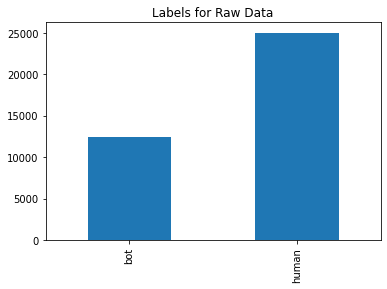

In [63]:
data_df.account_type.value_counts().sort_values().plot(kind = 'bar', title = "Labels for Raw Data")

In [64]:
data_df.isnull().sum()

default_profile              0
default_profile_image        0
favorites_count              0
followers_count              0
friends_count                0
geo_enabled                  0
lang                      7957
location                     3
statuses_count               0
verified                     0
average_tweets_per_day       0
account_age_days             0
account_type                 0
dtype: int64

In [65]:
data_df['location'].value_counts()

unknown                    13023
Los Angeles, CA              524
New York, NY                 339
United States                239
Washington, DC               224
                           ...  
Northern Colorado              1
Mercersburg, PA                1
\nİzmir                        1
The Beach                      1
En constante movimiento        1
Name: location, Length: 12047, dtype: int64

In [66]:
lang_df = data_df[data_df.lang.isnull()]

In [67]:
lang_df['location'].value_counts()

unknown             4736
Los Angeles, CA       59
United States         28
New York              21
Houston, TX           19
                    ... 
In his arms            1
Minoa, NY              1
Universal              1
On the moon            1
Trabzon, Türkiye       1
Name: location, Length: 2242, dtype: int64

In [68]:
lang_df['account_type'].value_counts()

bot      4493
human    3464
Name: account_type, dtype: int64

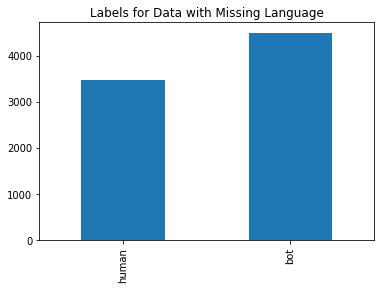

In [69]:
lang_df.account_type.value_counts().sort_values().plot(kind = 'bar',title = "Labels for Data with Missing Language")

In [70]:
data_df.isnull().sum().sum()

7960

In [71]:
loc_df = data_df[data_df.location.isnull()]

In [72]:
loc_df['account_type'].value_counts()

human    2
bot      1
Name: account_type, dtype: int64

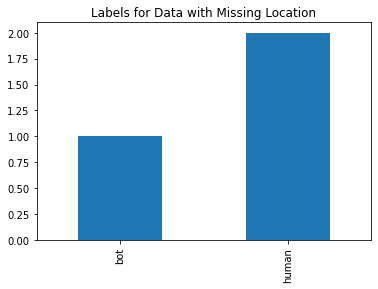

In [73]:
loc_df.account_type.value_counts().sort_values().plot(kind = 'bar', title = "Labels for Data with Missing Location")

Below we change boolen features to 1,0 integer representation of the features as well as changing the labels from "human" and "bot" to 1,0. 

In [74]:
for c in data_df:
  if data_df[c].dtype == bool:
    data_df[c] = data_df[c].astype(int)

In [75]:
data_df["account_type"] = np.where(data_df['account_type'] == 'human', 1, 0)

#Plan of Action
1. **Imputation** \\
    With almost 20% of the data having a missing value it is important to try to impute the missing values to try to keep as much data as we can.  
2. **Encoding Categorical values** \\
    With such high cardinality amongst our categorical variables, we cannot just one-hot encode these values as it will increase the number of our features in our model immensely. Binary Encoding and Target Encoding to see which approach works best with our data.
3. **Sampling** \\
  Given the mild class imbalance, I will try both under and over-sampling on the training data to see if balancing the classes, improves model performance. 
4. **Scaling** \\
Given the range of values in the numeric data, I will use both normalization and standardization and compare the performance in a KNN model

5. **Model Selection** \\
All the above steps are possible costs we must incur to preprocess our data for our model. If the given data set is expanded to 100,000's rows, the above processing techniques can become very expensive. So firstly, I will remove the categorical data and train simple models on the remaining raw data and see how well the models perform. I will then compare the performance of these models to models with preprocessed data. This is will allow us to see how effective the above models are in improving our models.








#Imputation
I chose to use a simple imputer to impute missing values. For all Null values, I replace them with "missing". I chose to include this technique because I thought the fact these feature values were missing for some data points could be informative of if it is a "bot" or "human". If I had used the most frequent method, I would have written in "unknown" for all the locations and "en" for the missing languages, which might lose the inherent information is the missingness of those features. 

In [120]:
df = data_df.copy()

##Simple Imputer: Missing

In [121]:
imputer = SimpleImputer(strategy='constant', fill_value='missing')
imp_miss_df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [122]:
imp_miss_df

,default_profile,default_profile_image,favorites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,0,4,1589,4,0,en,unknown,11041,0,7.87,1403,0
1,0,0,536,860,880,0,en,Estados Unidos,252,0,0.183,1379,1
2,0,0,3307,172,594,1,en,"Los Angeles, CA",1001,0,0.864,1159,1
3,1,0,8433,517,633,1,en,"Birmingham, AL",1324,0,0.889,1489,1
4,0,0,88,753678,116,1,en,"England, United Kingdom",4202,1,1.339,3138,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37433,1,0,651,139,1105,0,en,Kingston Upon Hull,340,0,0.084,4028,1
37434,0,0,8839,1121486,605,1,en,unknown,24970,1,8.976,2782,1
37435,1,0,399,85630,190,0,it,En constante movimiento,6174,1,2.226,2773,1
37436,0,0,967,138,166,1,en,"Los Angeles, CA",982,0,0.339,2899,1


In [123]:
imp_miss_df.isnull().sum()

default_profile           0
default_profile_image     0
favorites_count           0
followers_count           0
friends_count             0
geo_enabled               0
lang                      0
location                  0
statuses_count            0
verified                  0
average_tweets_per_day    0
account_age_days          0
account_type              0
dtype: int64

In [124]:
imp_miss_df.dtypes

default_profile           object
default_profile_image     object
favorites_count           object
followers_count           object
friends_count             object
geo_enabled               object
lang                      object
location                  object
statuses_count            object
verified                  object
average_tweets_per_day    object
account_age_days          object
account_type              object
dtype: object

In [125]:
for c in imp_miss_df:
  if c not in ["lang","location"]:
    imp_miss_df[c] = imp_miss_df[c].astype(int)

In [126]:
features_miss_imp = imp_miss_df.drop("account_type", axis = 1)
labels_miss_imp = imp_miss_df['account_type']

#Encoding Categorical Features
Given that we have only 13 given features, a dimension reduction does not seem necessary to have models run in a reasonable amount of time. I tried to encode the categorical data in "lang" and "location". Since there is such high cardinality in both, hot one encoding is not feasible, So I tried both Binary and Target encoding.

In [132]:
df_1 = imp_miss_df.copy()

##Binary Encoding 
Binary encoding first uses and ordinal encoder to convert it into numeric data and then these numbers are transformed into a binary number. This is memory effecient and works well with features that have a high cardinality while also creatinf less features than one-hot encoding.

In [128]:
encoder= ce.BinaryEncoder(cols=['location','lang'],return_df=True)
                                               

In [ ]:
df=encoder.fit_transform(df_1) 
df

##Target Encoding
With target encoding we calculate the mean value of the label for each category $P(label, category_{i}$) where label $\in$ (0,1). It then replaces the categorical variable with the posterior probability of the label(target). It is important to note that this method falls prey to unevenly distributed data in terms of the present categories in the feature. 

In [136]:
encoder = ce.TargetEncoder()
df_1["Location Encoded"] = encoder.fit_transform(df_1['location'], df_1['account_type'])
encoder = ce.TargetEncoder()
df_1["Lang Encoded"] = encoder.fit_transform(df_1['lang'], df_1['account_type']) 

# data_df["Lang Encoded"] = encoder.fit_transform(data_df['lang'], data_df['account_type'])     

In [137]:
df_1.drop(["location", "lang"], axis =1, inplace = True)

In [ ]:
df.columns

In [138]:
df = df_1.copy()

##split the data into features and labels to use in models later 
depedending on which encoding scheme chosen, save the feature and labels to use later for modeling

In [139]:
features_enc = df.drop("account_type", axis = 1)
labels_enc = df['account_type']

#Dealing with Class Imbalance: Sampling
The data provided as a moderate class imbalance so I will implement both under and over sampling on the trainning dataset to correct this. 

balancing raw data with no categorical features

In [146]:
df = data_df.drop(['location', 'lang'], axis = 1)

In [147]:
features = df.drop("account_type", axis = 1)
labels = df["account_type"]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

Imputed and Encoded data 

In [148]:
X_train, X_test, y_train, y_test = train_test_split(features_enc, labels_enc, test_size=0.2, random_state=42)

##Undersampling
Undersampling removes datapoints form the majority class ("human") so that the number of datapoints with each label is equal

In [149]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)

##Oversampling
Oversampling duplicates datapoints form the minority class ("bot") so that the number of datapoints with each label is equal

In [150]:
ros = RandomOverSampler(random_state=42)# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X_train, y_train)

#Model Selection

First, we train our models on the complete raw datasets without the categorical data (which also contains all the missing values). \\
Throughout all the different models I will be training, I will use Accuracy, F1 score, and AUCROC metrics to evaluate the models' performances. We use more than just the Accuracy to determine our model's performance because we have a class imbalance (although it is only moderate). The F1 score provides a single statistic that combines the precision(#of positive predictions that have positive labels) and recall(TPR)of the model. This is a helpful statistic because a model can have very high accuracy due to a class imbalance in the available data but that does not mean it is a good model. We would like this value to be as close to 1 as possible.
The AUCROC metric explains how well the model distinguishes the two classes. It measures the area under the curve by plotting the TPR(sensitivity) against the FPR(1-TNR). The close to 1 this metric is, the better the model is at distinguishing the classes. \\

I also trained a range of models with different complexity from a simple logistic regression model to a small KNN to see how complicated the necessary model should be to deal with the data. Intuitively I am thinking Random Forrest Classifier will perform best due to its ability to work with class imbalance better and also it is a bit more complex than a Logistic regression model but not as complicated as a KNN, so it seems to me it will be in the sweet spot. 

In [153]:
d_df = data_df.drop(["location", "lang"], axis =1)

In [ ]:
d_df.dtypes

In [154]:
features = d_df.drop("account_type", axis = 1)
labels = d_df['account_type']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

## Naive Bayes

In [34]:
nb = GaussianNB()

nb.fit(X_train, y_train)
train = nb.predict(X_train)
pred = nb.predict(X_test)

print("Training Metrics")
print('ROCAUC score:',roc_auc_score(y_train, train))
print('Accuracy score:',accuracy_score(y_train, train))
print('F1 score:',f1_score(y_train, train))
print("Testing Metrics")
print('ROCAUC score:',roc_auc_score(y_test, pred))
print('Accuracy score:',accuracy_score(y_test, pred))
print('F1 score:',f1_score(y_test, pred))

Training Metrics
ROCAUC score: 0.7218611477508746
Accuracy score: 0.7376961602671118
F1 score: 0.7966452681714641
Testing Metrics
ROCAUC score: 0.7277750722473117
Accuracy score: 0.7457264957264957
F1 score: 0.8040749125334432


##Logisitic Regression


In [35]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
train = lr.predict(X_train)
pred = lr.predict(X_test)

print("Training Metrics")
print('ROCAUC score:',roc_auc_score(y_train, train))
print('Accuracy score:',accuracy_score(y_train, train))
print('F1 score:',f1_score(y_train, train))
print("Testing Metrics")
print('ROCAUC score:',roc_auc_score(y_test, pred))
print('Accuracy score:',accuracy_score(y_test, pred))
print('F1 score:',f1_score(y_test, pred))

Training Metrics
ROCAUC score: 0.7090616529659584
Accuracy score: 0.7559265442404006
F1 score: 0.8228565889594339
Testing Metrics
ROCAUC score: 0.7112917585361095
Accuracy score: 0.7593482905982906
F1 score: 0.8258600695786625


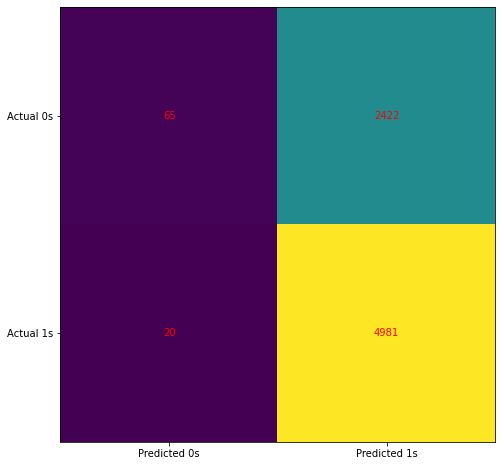

In [33]:
cm = confusion_matrix(y_test, lr.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

##Random Forest Classifier



In [39]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
train = rfc.predict(X_train)
pred = rfc.predict(X_test)

print("Training Metrics")
print('ROCAUC score:',roc_auc_score(y_train, train))
print('Accuracy score:',accuracy_score(y_train, train))
print('F1 score:',f1_score(y_train, train))
print("Testing Metrics")
print('ROCAUC score:',roc_auc_score(y_test, pred))
print('Accuracy score:',accuracy_score(y_test, pred))
print('F1 score:',f1_score(y_test, pred))

Training Metrics
ROCAUC score: 0.9999496880660093
Accuracy score: 0.9999666110183639
F1 score: 0.9999750156152405
Testing Metrics
ROCAUC score: 0.8467770860785624
Accuracy score: 0.8766025641025641
F1 score: 0.9101342151332426


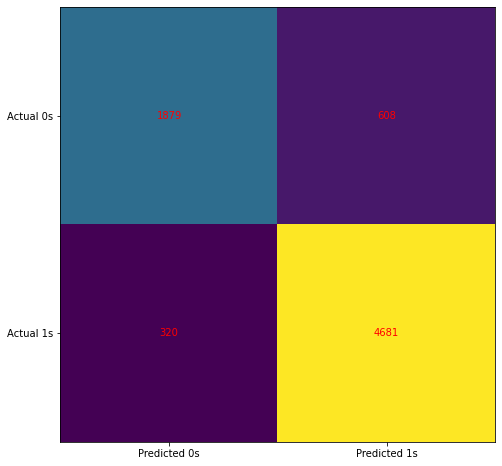

In [35]:
cm = confusion_matrix(y_test, rfc.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

##KNN


Nearest neighbors are known to perform better with scaling the data. So I implemented both standardization and normalization on the raw data before training the model to see which one provides better results. I scale the train and test sets differently so that we make sure no information about the test data points is kept in the training data. 

In [31]:
dknn_df = data_df.drop(["location","lang"], axis =1)

In [40]:
dknn_df

,default_profile,default_profile_image,favorites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,0,4,1589,4,0,11041,0,7.870,1403,0
1,0,0,536,860,880,0,252,0,0.183,1379,1
2,0,0,3307,172,594,1,1001,0,0.864,1159,1
3,1,0,8433,517,633,1,1324,0,0.889,1489,1
4,0,0,88,753678,116,1,4202,1,1.339,3138,1
...,...,...,...,...,...,...,...,...,...,...,...
37433,1,0,651,139,1105,0,340,0,0.084,4028,1
37434,0,0,8839,1121486,605,1,24970,1,8.976,2782,1
37435,1,0,399,85630,190,0,6174,1,2.226,2773,1
37436,0,0,967,138,166,1,982,0,0.339,2899,1


In [32]:
features = dknn_df.drop("account_type", axis = 1)
labels = dknn_df['account_type']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [34]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [35]:
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

cols = ['favorites_count','followers_count','friends_count','statuses_count','average_tweets_per_day','account_age_days']

for c in cols:
    scale = StandardScaler().fit(X_train_stand[[c]])
    X_train_stand[c] = scale.transform(X_train_stand[[c]])
    X_test_stand[c] = scale.transform(X_test_stand[[c]])

In [43]:
print(y_train)

5514     1
34577    1
1406     1
25609    0
11216    1
        ..
16850    1
6265     0
11284    0
860      1
15795    1
Name: account_type, Length: 29950, dtype: int64


In [46]:
knn = KNeighborsClassifier(n_neighbors=10)

acc = []
f1 = []
auc = []

train_X = [X_train, X_train_norm, X_train_stand]
test_X = [X_test, X_test_norm, X_test_stand]


for i in range(len(train_X)):
    knn.fit(train_X[i],y_train)
    pred = knn.predict(test_X[i])
    acc.append(accuracy_score(y_test,pred))
    f1.append(f1_score(y_test,pred))
    auc.append(roc_auc_score(y_test,pred))

df_knn = pd.DataFrame({'Accuracy':acc, 'F1 score': f1, 'ROCAUC' : auc},index=['Original','Normalized','Standardized'])
df_knn


,Accuracy,F1 score,ROCAUC
Original,0.848558,0.887344,0.826084
Normalized,0.795673,0.844068,0.779317
Standardized,0.822382,0.865221,0.806589


##Findings and Thoughts 
Comparing the above models, we see that the Random Forest Classifier performs best with the raw data (overlooking scaling performed for a few of the models). Scaling data for Random Forest would not improve performance because it is a tree-based algorithm that partitions the data. KNN calculates the euclidian distance between points, so scaling does change the algorithm's performance. In the above case, we saw that scaling did not improve our model's metrics which is unexpected. It must be remembered that scaling does NOT ALWAYS improve performance but this is unexpected. The Logistic Regression model and Naive Bayes models perform less well than the RF model on all metrics we are using. RF models generally perform better with a class imbalance where there are more positives than negatives ("humans" than "bots") which is true in the case of our data. \\
Looking forward, I also know that Random Forest models do perform better with categorical data as well. \\
The trade-off between the Logistic Regression and RF models is time vs performance. The Logistic Regression is much faster to train so thinking about expanding this model for use with larger datasets must be kept in mind. Naive Bayes is also a smaller model that adapts to changes in data better than a Random Forest but also performs worse with class imbalance. \\
I have also chosen not to perform K-fold Cross-Validation on any of the models because due to the moderate class imbalance, the folds created might exacerbate the class imbalance negatively affecting the model's ability to generalize its learning. \\
Next, I will try to optimize the hyperparameters of the Random Forest Model to see if we can find hyperparameter values to improve the performance. 


#Hyper Parameter Tuning: Randomized Search 
I chose to use a randomized search over a grid search because it allows me to find a hyperparameter setting that I would not have guessed intuitively. I must concede that there is high variance in the performance of the RandomizedSearchCV and does take time to run. However given the smaller dataset, I think it is a cost worth incurring to try to see if we can improve the performance of the model. \\



In [47]:
from sklearn.model_selection import RandomizedSearchCV


max_features = [1,3,6,9]

max_depth = [1,3,6,9,12,15, 20, 25 , 30 , 35, 40, None]


min_samples_split = [1.0,3,6,9,12,15,20, 25, 30, 40 , 50]

min_samples_leaf = [3,6,9,12,15, 20, 30 , 40 , 50]

bootstrap = [True, False]

random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [49]:

rf = RandomForestClassifier()
 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, n_jobs = -1)

rf_random.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 3, 6, 9, 12, 15, 20,
                                                      25, 30, 35, 40, None],
                                        'max_features': [1, 3, 6, 9],
                                        'min_samples_leaf': [3, 6, 9, 12, 15,
                                                             20, 30, 40, 50],
                                        'min_samples_split': [1.0, 3, 6, 9, 12,
                                                              15, 20, 25, 30,
                                                              40, 50]})

In [50]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 9,
 'min_samples_leaf': 9,
 'min_samples_split': 9}

In [54]:
rfc = RandomForestClassifier(max_depth = 20, max_features = 9, min_samples_leaf = 9, min_samples_split = 9, bootstrap = True)
# X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)
# fit the predictor and target
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
rfc.fit(X_train, y_train)

# predict
train= rfc.predict(X_train)
pred = rfc.predict(X_test)

print("Training Metrics")
print('ROCAUC score:',roc_auc_score(y_train, train))
print('Accuracy score:',accuracy_score(y_train, train))
print('F1 score:',f1_score(y_train, train))
print("Testing Metrics")
print('ROCAUC score:',roc_auc_score(y_test, pred))
print('Accuracy score:',accuracy_score(y_test, pred))
print('F1 score:',f1_score(y_test, pred))

Training Metrics
ROCAUC score: 0.8923070086304022
Accuracy score: 0.9161936560934891
F1 score: 0.938878877903862
Testing Metrics
ROCAUC score: 0.8442613045545293
Accuracy score: 0.875267094017094
F1 score: 0.9093379926227916


##Finding and Thoughts 
In the below implementation is take around 45 minutes to run completely. \\
After fitting a model with the best parameters we can actually see tht there is not a significant improvement in the performance of the model. This could be due to the natural noise in the data. 

#Models: Feature Engineering

To use the engineered data, I will use both a Logistic Regression and Random Forest Classifier. I chose these two models because I thought it would help me see clearly if any of the feature engineering improved performance by a significant amount. The Logistic regression model will help chose if balancing the classes is important and the Random Forest Model is so far the best performing model and should still perform well with categorical data.


##Logisitc Regression: imputed and encoded 
Here imputation and encoding did not improve performance at all. This is understandable as logistic regression does not normally perform well with categorical variables or class imbalance ( which still persists in this setting)

In [140]:
# run either the binary or target encoding before and "split the data into feature... later" running this cell
X_train, X_test, y_train, y_test = train_test_split(features_enc, labels_enc, test_size=0.2, random_state=42)

In [92]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
train = lr.predict(X_train)
pred = lr.predict(X_test)

print("Training Metrics")
print('ROCAUC score:',roc_auc_score(y_train, train))
print('Accuracy score:',accuracy_score(y_train, train))
print('F1 score:',f1_score(y_train, train))
print("Testing Metrics")
print('ROCAUC score:',roc_auc_score(y_test, pred))
print('Accuracy score:',accuracy_score(y_test, pred))
print('F1 score:',f1_score(y_test, pred))

Training Metrics
ROCAUC score: 0.5086916304634607
Accuracy score: 0.6726878130217029
F1 score: 0.8026652173037824
Testing Metrics
ROCAUC score: 0.5110683532774748
Accuracy score: 0.6738782051282052
F1 score: 0.8031280232183167


##Random Forest Classifier: imputed and encoded 
Here I saw that target encoding provided marginally better results but not enough to support the encoding method as the dataset grows. With each new row, we could have had just as many new unique languages and locations and with an increase in performance of around 2% in the F1 score and 1% in the accuracy, it does not seem worth it. 

In [141]:
rfc = RandomForestClassifier(max_depth = 20, max_features = 9, min_samples_leaf = 9, min_samples_split = 9, bootstrap = True)

rfc.fit(X_train, y_train)
train = rfc.predict(X_train)
pred = rfc.predict(X_test)

print("Training Metrics")
print('ROCAUC score:',roc_auc_score(y_train, train))
print('Accuracy score:',accuracy_score(y_train, train))
print('F1 score:',f1_score(y_train, train))
print("Testing Metrics")
print('ROCAUC score:',roc_auc_score(y_test, pred))
print('Accuracy score:',accuracy_score(y_test, pred))
print('F1 score:',f1_score(y_test, pred))

Training Metrics
ROCAUC score: 0.9006533190168411
Accuracy score: 0.9222704507512521
F1 score: 0.9431474064667382
Testing Metrics
ROCAUC score: 0.8533072637583461
Accuracy score: 0.8814102564102564
F1 score: 0.9134502923976608


## Logisitc Regression : Sampling to deal with Class imbalance 
Here I hoped the sampling techniques would help the logisitc regression model perform better, however the opposite happened. 

In [151]:
# run "dealing with class imbalance" section RIGHT before this section to ensure you have to correct trainning and testing splits
acc = []
f1 = []
auc = []

train_X = [X_train, x_ros, x_rus]
train_y = [y_train, y_ros, y_rus]


for i in range(len(train_X)):
  lr = LogisticRegression()

  lr.fit(train_X[i], train_y[i])
  pred = lr.predict(X_test)

  acc.append(accuracy_score(y_test,pred))
  f1.append(f1_score(y_test,pred))
  auc.append(roc_auc_score(y_test,pred))

df_lr = pd.DataFrame({'Accuracy':acc, 'F1 score': f1, 'ROCAUC' : auc},index=['Original','Oversampled','Undersampled'])
df_lr

,Accuracy,F1 score,ROCAUC
Original,0.673878,0.803128,0.511068
Oversampled,0.664931,0.685392,0.724793
Undersampled,0.662260,0.681927,0.722996


##Random Forest Classifier: Sampling to deal with class imbalance
I don't expect performance to increase significantly in this case due to the fact RF is good at dealing with the class imbalance. My thoughts were confirmed as all metrics stayed around the same values across the three settings


In [152]:
# run "dealing with class imbalance" section RIGHT before this section to ensure you have to correct trainning and testing splits
acc = []
f1 = []
auc = []

train_X = [X_train, x_ros, x_rus]
train_y = [y_train, y_ros, y_rus]


for i in range(len(train_X)):
  RandomForestClassifier(max_depth = 20, max_features = 9, min_samples_leaf = 9, min_samples_split = 9, bootstrap = True)

  rfc.fit(train_X[i], train_y[i])
  pred = rfc.predict(X_test)


  acc.append(accuracy_score(y_test,pred))
  f1.append(f1_score(y_test,pred))
  auc.append(roc_auc_score(y_test,pred))

df_rfc = pd.DataFrame({'Accuracy':acc, 'F1 score': f1, 'ROCAUC' : auc},index=['Original','Oversampled','Undersampled'])
df_rfc

,Accuracy,F1 score,ROCAUC
Original,0.880342,0.912722,0.851800
Oversampled,0.872863,0.903916,0.861462
Undersampled,0.860710,0.892352,0.858832


#Conclusion

Overall the best model I found was a Random Forest Classifier using target encoding and imputation. This model has an F1 score of 91%, an accuracy score of 88%, and a ROCAUC score of 85%. The second-best model was a Random Forest Classifier without the categorical variables included which performed at the level of the aforementioned model but 1-2% less on each metric. \\
The accuracy is not ideal but it is also important to see that we have a very good F1 score which means the model has pretty good precision(how many is it classifying correctly) and also does not misclassify a lot of instances. The metric is less intuitive but allows us to ensure that our model isn't falling victim to class imbalance. The relatively high ROCAUC is also a good sign because this means the model is pretty good at distinguishing the two classes. \\
The multiple efforts at data engineering including the scaling, imputing, and encoding along with the randomized hyperparameter search didn't immensely improve performance. I am starting to believe that there might be noise in the data that is restricting performance. \\
Ways to improve future performance would be to find more data and find new features of data that might help the model learn better. Along with this, I could try more sophisticated imputation methods like MICE imputations, or KKN-iterative imputations. Choices in these methods are restricted due to the sheer cardinality of the categorical variables. Along with this, I could try implement FAMD factor component analysis which is PCA and MCA combinations for mixed type datasets. \\

